# 1. Motivation
For this project, we chose to work with the Global Terrorism Database (GTD) — one of the most comprehensive open-source datasets on terrorist activity worldwide. It contains detailed information on more than 200,000 terrorist incidents from 1970 to 2020, including data on the type of attack, location, casualties, weapons, perpetrators, and other critical attributes.

We selected this dataset for two reasons: first, terrorism is a topic with deep geopolitical, social, and humanitarian impact, and visualizing its trends helps build understanding of global and regional conflict dynamics. Second, the richness of the GTD makes it suitable for diverse forms of analysis and storytelling, including both quantitative trends and human-centered consequences.

Our goal was to design a visually-driven experience that allows users to:
- Observe temporal and regional trends in terrorism,
- Understand the tactics and impact of attacks over time,
- Explore connections between perpetrators, weapons, and victims.

We divided the project into three complementary perspectives:
1. Incident and Attack (structure, type, and evolution of events)
2. Victims and Consequences (casualties and human cost)
3. Weapons and Perpetrators (means and motives of terrorism)

# 2. Basic stats 
Let's understand the dataset better
Write about your choices in data cleaning and preprocessing
Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

The original dataset we used was provided as an Excel (.xlsx) file, which we converted to CSV format to make it easier to load and process using Python. The full dataset consists of over 200,000 rows and more than 120 columns, offering extensive metadata for each recorded terrorist incident from 1970 to 2019.

However, not all of that information was relevant for our project goals. We focused on understanding and visualizing trends in attacks, their impact, and the actors involved. Therefore, we performed a cleaning and selection process to streamline the data:
- We removed columns that were either irrelevant to our analysis or had a high proportion of missing values.
- The final selection of columns used across most of our analyses was:<span style="color:red">Missing values ['iyear', 'iday', 'imonth', 'country', 'country_txt', 'region', 'region_txt',
 'city', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targsubtype1', 'nwound', 'natlty1', 'nkill']</span>
- For each specific line of inquiry (incidents, consequences, or weapons), we made sure to filter out entries that lacked the required data for that part of the analysis — for example, skipping rows without weapon information in the attacks section. Despite this filtering, the vast majority of entries were usable, and we were able to retain the core of the dataset for robust statistical exploration.

To get a better sense of the overall structure of the dataset—spanning over 200,000 terrorist incidents from 1970 to 2019—we began with general visualizations.

The calendar map provided a clear overview of how attack frequency evolved over time, revealing periods of escalation and decline. Another useful visualization showed the number of attacks per terrorist group each year, helping us identify when major groups were most active.

These high-level plots helped us understand the dataset’s scale, structure, and dynamics before diving into more specific analyses.

# 3. Data Analysis

# Incident + attack
- when and where attacks happen. Viz: interactive map, heatmap...
- what kind of attack? 
- why the attack happened? Successful/suicide?

This section aims to answer when and where attacks happen. We will also take a look into the types of attacks and the specific regions for those type of attacks.

## Filtering Dataset

In [4]:
import pandas as pd
import numpy as np

# Transform the data from xlsx to csv
# Replace 'Sheet1' with the actual sheet name from the Excel filed
df = pd.read_excel('globalterrorismdb_0522dist.xlsx', sheet_name='Data')
df.to_csv('globalterrorismdb_0522dist.csv', index=False)

In [5]:
# Filter the data to include only the relevant columns for "Incident + Attack" section
df = df[['iyear', 'iday', 'imonth', 'country', 'country_txt', 'region', 'region_txt', 'city', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1', 'attacktype1_txt']]
df.to_csv('filtered_data_globalterrorism.csv', index=False)

# Calendar plot (attacks each year)

(<Figure size 1250x8500 with 51 Axes>,
 array([<Axes: ylabel='1970'>, <Axes: ylabel='1971'>,
        <Axes: ylabel='1972'>, <Axes: ylabel='1973'>,
        <Axes: ylabel='1974'>, <Axes: ylabel='1975'>,
        <Axes: ylabel='1976'>, <Axes: ylabel='1977'>,
        <Axes: ylabel='1978'>, <Axes: ylabel='1979'>,
        <Axes: ylabel='1980'>, <Axes: ylabel='1981'>,
        <Axes: ylabel='1982'>, <Axes: ylabel='1983'>,
        <Axes: ylabel='1984'>, <Axes: ylabel='1985'>,
        <Axes: ylabel='1986'>, <Axes: ylabel='1987'>,
        <Axes: ylabel='1988'>, <Axes: ylabel='1989'>,
        <Axes: ylabel='1990'>, <Axes: ylabel='1991'>,
        <Axes: ylabel='1992'>, <Axes: ylabel='1994'>,
        <Axes: ylabel='1995'>, <Axes: ylabel='1996'>,
        <Axes: ylabel='1997'>, <Axes: ylabel='1998'>,
        <Axes: ylabel='1999'>, <Axes: ylabel='2000'>,
        <Axes: ylabel='2001'>, <Axes: ylabel='2002'>,
        <Axes: ylabel='2003'>, <Axes: ylabel='2004'>,
        <Axes: ylabel='2005'>, <Axes: ylabe

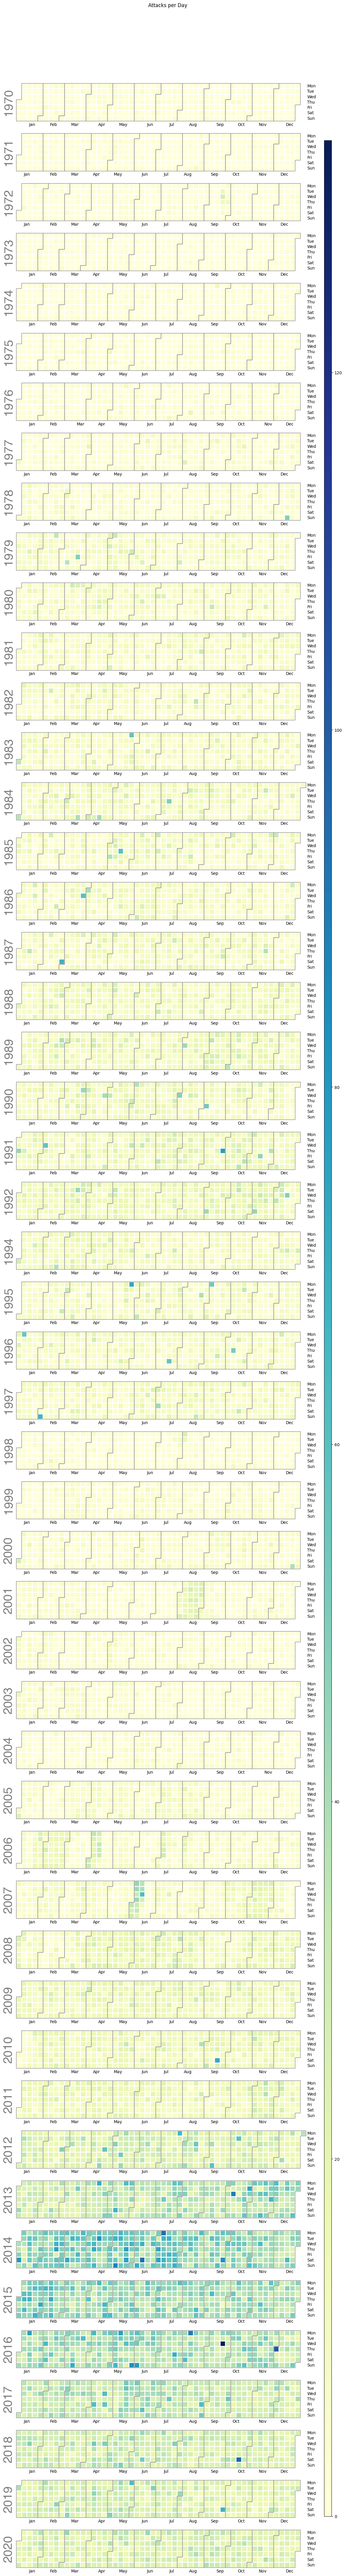

In [6]:
import matplotlib.pyplot as plt
import calplot

# Filter out rows where day = 0 (to exclude unknown days)
df = df[df['iday'] != 0]

# Create a 'date' column
df['date'] = pd.to_datetime(df[['iyear', 'imonth', 'iday']].rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day'}))

# Group by date and count the number of attacks per day
attacks_per_day = df['date'].value_counts().sort_index()

# Creat a pivot table with the counts of attacks per day
attacks_per_day_pivot = attacks_per_day.reset_index()
attacks_per_day_pivot.columns = ['Date','Attacks']

# Ensure the 'Date' column is set as the index
attacks_per_day_pivot.set_index('Date', inplace=True)

# Plot using calplot
calplot.calplot(attacks_per_day_pivot['Attacks'], suptitle='Attacks per Day', cmap='YlGnBu', colorbar=True)

# Calendar Visualization Explanation

This calendar visualization provides a clear, high-level view of the evolution in the frequency of terrorist attacks over time. In the early 1970s, the dataset shows relatively low daily attack counts, suggesting that terrorism was less frequent or less systematically recorded during that period. Moving into the 1980s, occasional spikes begin to appear, indicating an uptick in both the occurrence and visibility of attacks.

The trend remains fairly consistent throughout the 1990s, but in the months leading up to September 11, 2001, there's a noticeable increase in daily incidents. Interestingly, following the 9/11 attacks, there is a sharp drop in the frequency of attacks, which persists until around 2006–2007. This period of reduced activity may reflect increased global counterterrorism efforts or shifts in reporting.

Beginning in 2012, the number of attacks rises dramatically, peaking in 2014—a year that aligns with the height of ISIS activity and unrest in the Middle East. After 2017, the frequency of attacks begins to decline again, suggesting a potential de-escalation or success in counterterrorism efforts in some regions.

Overall, the calendar format effectively highlights temporal patterns and significant turning points in global terrorism trends.

# Heat map with time series
World map of attacks per year

In [7]:
import pandas as pd
import folium
from folium.plugins import HeatMapWithTime

# Load the data
df = pd.read_csv('filtered_data_globalterrorism.csv')

# Drop rows with missing coordinates
df = df.dropna(subset=['latitude', 'longitude', 'iyear'])

# Group data by year
years = sorted(df['iyear'].unique())
heat_data = []

for year in years:
    yearly_data = df[df['iyear'] == year]
    locations = yearly_data[['latitude', 'longitude']].values.tolist()
    heat_data.append(locations)

# Create a base map
map_hooray = folium.Map(location=[20, 0], zoom_start=2)

# Create and add the time-enabled heatmap
heatmap = HeatMapWithTime(    heat_data,
    index=years,
    auto_play=True,
    max_opacity=0.3,
    radius=2,
    scale_radius=True
)

heatmap.add_to(map_hooray)

# Display the map
map_hooray

# Save the map to an HTML file for the webiste
#map_hooray.save('heatmap_globalterrorism.html')


# Heatmap Analyses

This heatmap provides a dynamic visualization of the geographic distribution of terrorist attacks over time. One of the most striking patterns is the apparent underreporting or lack of data in the first two decades of the dataset—particularly in regions like Central Africa. Given that this region later emerges as one of the most active in terms of attacks, the early absence likely reflects data limitations rather than a true lack of activity.

Over the years, the intensity and location of attack concentrations fluctuate, but several regions consistently appear as hotspots. These include parts of Europe, the Middle East, a broad belt stretching across Central Africa (from west to east), Southeast Africa, the northern edge of South America, and a swath of South Asia spanning from Afghanistan to Malaysia—including the Philippines.

In addition to these persistent hotspots, the heatmap reveals smaller, time-bound concentrations of activity corresponding to localized conflicts. Examples include South Korea before the 2000s, Northern Ireland during the Troubles, Spain during the height of ETA activity, and Chile during the Pinochet regime. These regional spikes align with well-documented historical and political events, highlighting the value of temporal heatmapping in uncovering context-specific patterns in global terrorism trends.

# Atatck types

/var/folders/st/5c7v34vj5390886j8543y0bc0000gn/T/ipykernel_67706/3638586547.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(attack_type_counts.index, rotation=45, ha='right')


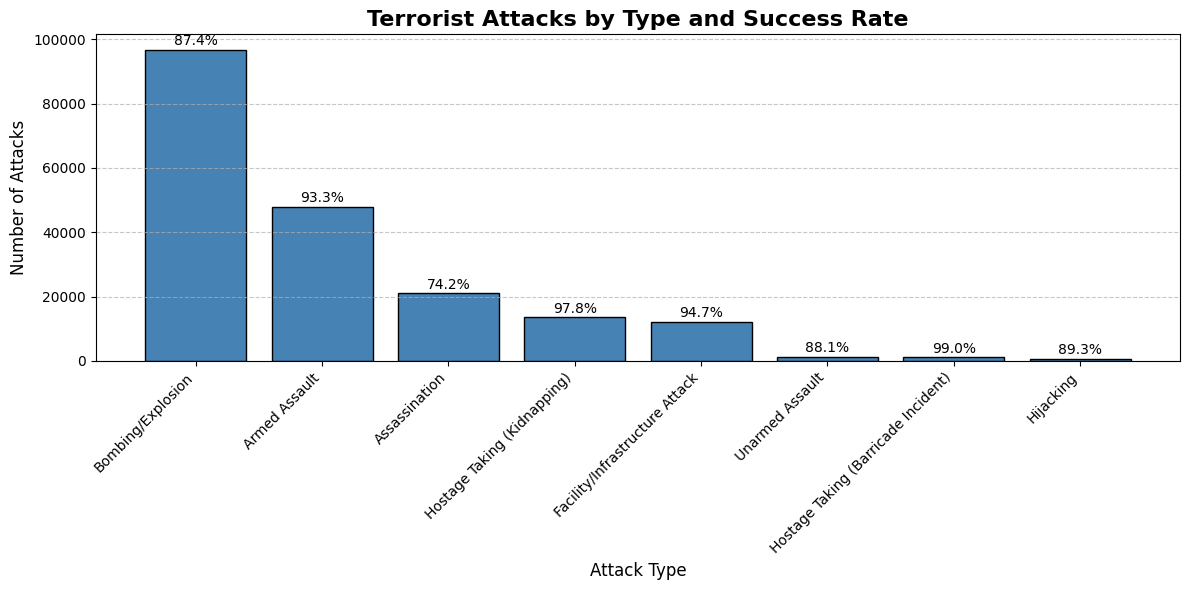

In [8]:
import matplotlib.pyplot as plt

# Count of attacks per type (excluding 'Unknown')
attack_type_counts = df['attacktype1_txt'].value_counts()
attack_type_counts = attack_type_counts[attack_type_counts.index != 'Unknown']
attack_type_counts = attack_type_counts.sort_values(ascending=False)

# Calculate success percentage for each attack type
success_counts = df[df['success'] == 1]['attacktype1_txt'].value_counts()
success_percentage = (success_counts / attack_type_counts) * 100

# Plot settings
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(attack_type_counts.index, attack_type_counts.values, color='steelblue', edgecolor='black')

# Add success % labels on top of each bar
for bar, pct in zip(bars, success_percentage[attack_type_counts.index]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 500, f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Titles and labels
ax.set_title('Terrorist Attacks by Type and Success Rate', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Attacks', fontsize=12)
ax.set_xlabel('Attack Type', fontsize=12)
ax.set_xticklabels(attack_type_counts.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


# Analysis
Bombing/Explosion is the most common type of attack. This is not surprising given the effectivity of a bomb against humans and infrastructure plus it can be done remotely. 

# Regions involved

/var/folders/st/5c7v34vj5390886j8543y0bc0000gn/T/ipykernel_67706/2933632520.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')
/var/folders/st/5c7v34vj5390886j8543y0bc0000gn/T/ipykernel_67706/2933632520.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.04, 0.05, 0.88, 0.95])


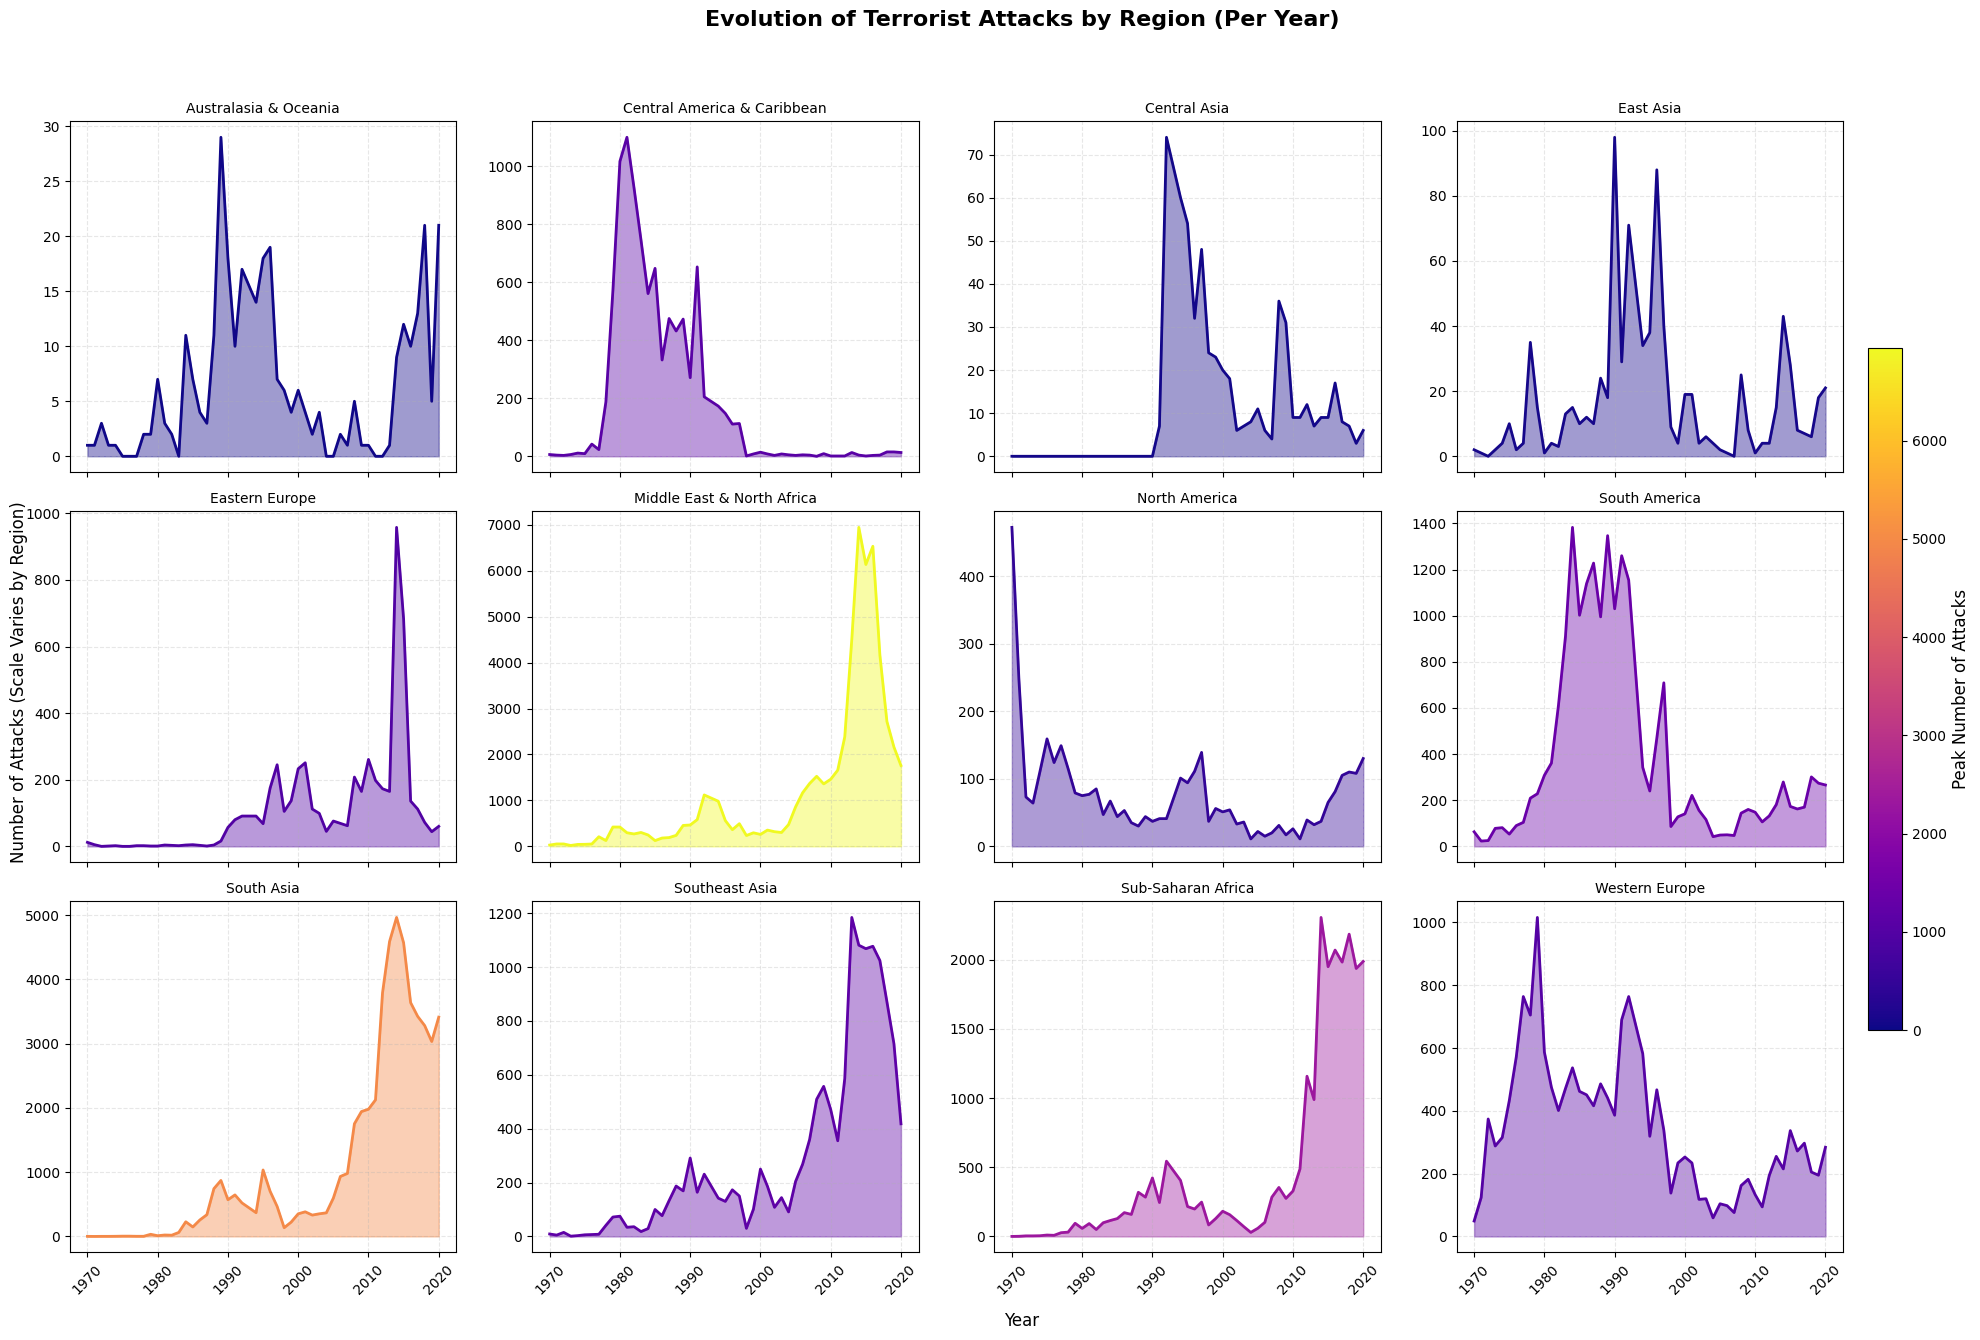

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Prepare the data
df = df.dropna(subset=['iyear', 'region_txt'])
attacks_by_region = df.groupby(['iyear', 'region_txt']).size().unstack(fill_value=0)

# Plot configuration
num_regions = len(attacks_by_region.columns)
cols = 4
rows = (num_regions + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(22, 14), sharex=True)
axes = axes.flatten()

# Global colormap normalization
global_max = attacks_by_region.values.max()
norm = colors.Normalize(vmin=0, vmax=global_max)
cmap = cm.get_cmap('plasma')

# Plot each subplot
for i, region in enumerate(attacks_by_region.columns):
    region_data = attacks_by_region[region]
    peak_val = region_data.max()
    color = cmap(norm(peak_val))  # consistent color scale

    # Fill and line
    axes[i].fill_between(region_data.index, region_data.values, color=color, alpha=0.4)
    axes[i].plot(region_data.index, region_data.values, color=color, linewidth=2)

    axes[i].set_title(region, fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].grid(True, linestyle='--', alpha=0.3)

# Turn off unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add main title and axis labels
fig.suptitle('Evolution of Terrorist Attacks by Region (Per Year)', fontsize=16, fontweight='bold')
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Number of Attacks (Scale Varies by Region)', va='center', rotation='vertical', fontsize=12)

# Add colorbar clearly outside
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes.tolist(), orientation='vertical', fraction=0.02, pad=0.15)
cbar.set_label('Peak Number of Attacks', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.04, 0.05, 0.88, 0.95])
plt.show()



# Analysis
This visualization captures both the temporal and regional heterogeneity of terrorism globally. It reveals how terrorism has shifted in focus over time, with some regions becoming more volatile in recent decades. The peak year trends also suggest links to major geopolitical shifts, civil conflicts, and insurgent activities.

1. Middle East & North Africa stands out with the highest peak of attacks, particularly during the early 2010s. The intense yellow tone in this plot highlights that the region experienced the most concentrated period of violence globally, peaking around 2014–2015.

2. South Asia and Sub-Saharan Africa also show high activity, with steep increases starting in the late 2000s and sharp peaks afterward. South Asia's curve is steep and sustained, indicating prolonged conflict intensity.

3. Southeast Asia, Central Asia, and South America exhibit mid-level peaks (orange to pink shading), suggesting regional but less globally dominant spikes in violence, often tied to specific insurgencies or political unrest.

4. Western Europe and North America show more episodic patterns — brief but sharp spikes in attacks (e.g., IRA in the UK or domestic terrorism in the US) but overall lower sustained intensity compared to conflict-heavy regions.

5. Eastern Europe and East Asia show relatively subdued activity, both in terms of frequency and intensity, reflected by darker tones and flatter curves.

6. Central America & Caribbean, despite having moments of activity, never reach the same peaks as other regions, indicating more localized or less frequent terrorist incidents.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import matplotlib
import seaborn as sns

df = pd.read_csv("globalterrorismdb_0522dist.csv", low_memory=False)

In [11]:
df = df[['iyear', 'iday', 'imonth', 'country', 'country_txt', 'region', 'region_txt', 'city', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1', 'attacktype1_txt','targtype1','targsubtype1','nwound','natlty1','nkill']]
df.to_csv('filtered_data_globalterrorism1.csv', index=False)

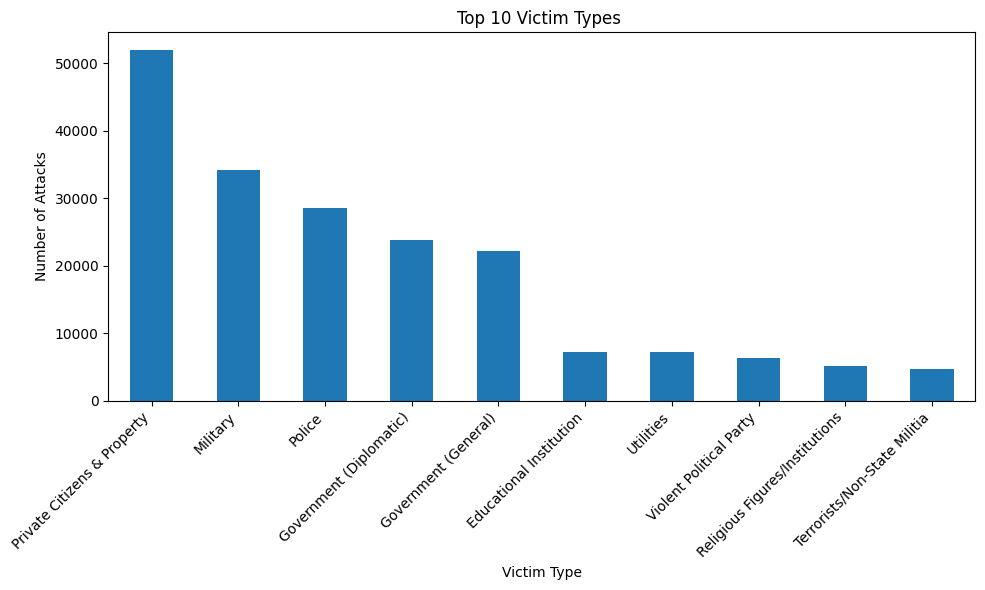

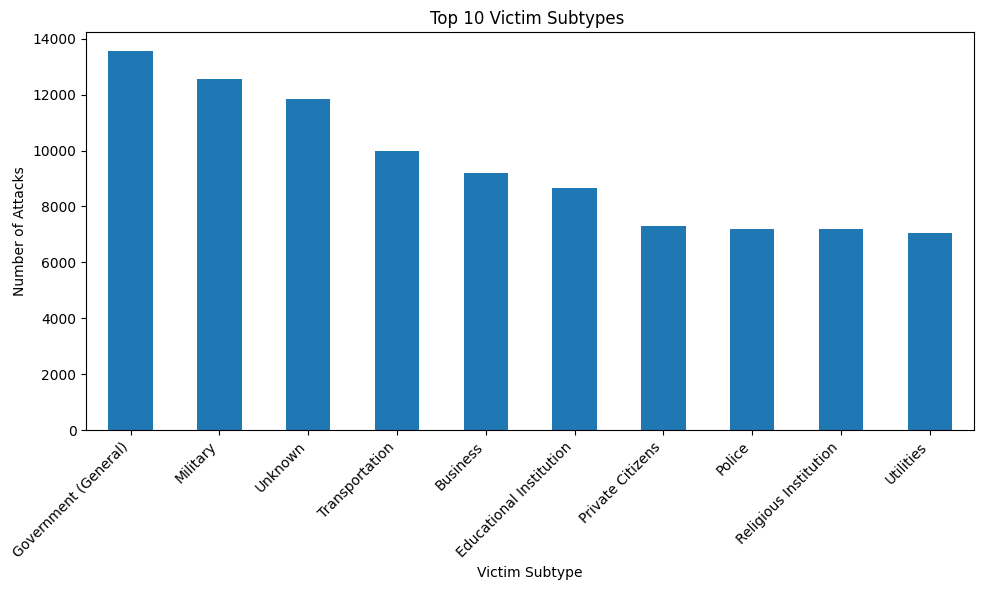

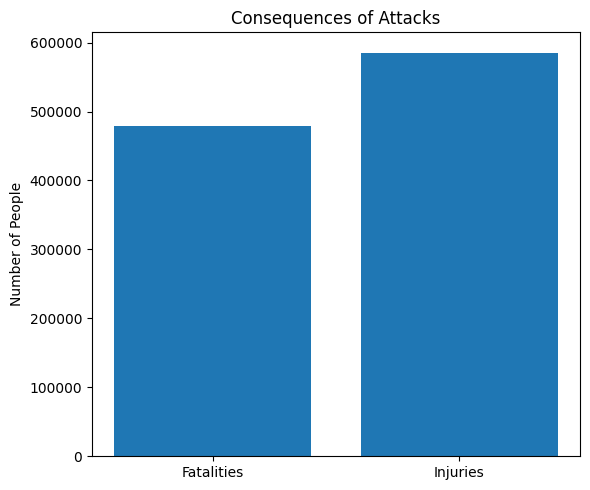

Total fatalities: 479348
Total injuries: 585606


In [12]:
df['targtype1'] = df['targtype1'].fillna(-1)
df['targsubtype1'] = df['targsubtype1'].fillna(-1)
df['natlty1'] = df['natlty1'].fillna(-1)
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)

targtype1_map = {
    1: 'Government (General)',
    2: 'Government (Diplomatic)',
    3: 'Police',
    4: 'Military',
    5: 'Abortion Related',
    6: 'Airports & Aircraft',
    7: 'Business',
    8: 'Terrorists/Non-State Militia',
    9: 'Food or Water Supply',
    10: 'Journalists & Media',
    11: 'Maritime',
    12: 'NGO',
    13: 'Other',
    14: 'Private Citizens & Property',
    15: 'Religious Figures/Institutions',
    16: 'Telecommunication',
    17: 'Tourists',
    18: 'Transportation',
    19: 'Utilities',
    20: 'Educational Institution',
    21: 'Violent Political Party'
}

targsubtype1_map = {
    -1: 'Unknown',
    15: 'Police',
    18: 'Private Citizens',
    22: 'Religious Institution',
    25: 'Military',
    27: 'Utilities',
    29: 'Business',
    34: 'Transportation',
    67: 'Government (General)',
    75: 'Educational Institution'
}

df['targtype1_label'] = df['targtype1'].map(targtype1_map)
df['targsubtype1_label'] = df['targsubtype1'].map(targsubtype1_map)

top_target_labels = df['targtype1_label'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_target_labels.plot(kind='bar')
plt.title('Top 10 Victim Types ')
plt.xlabel('Victim Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top_subtype_labels = df['targsubtype1_label'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_subtype_labels.plot(kind='bar')
plt.title('Top 10 Victim Subtypes ')
plt.xlabel('Victim Subtype')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

total_killed = df['nkill'].sum()
total_wounded = df['nwound'].sum()

plt.figure(figsize=(6, 5))
plt.bar(['Fatalities', 'Injuries'], [total_killed, total_wounded])
plt.title('Consequences of Attacks')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

print(f"Total fatalities: {int(total_killed)}")
print(f"Total injuries: {int(total_wounded)}")



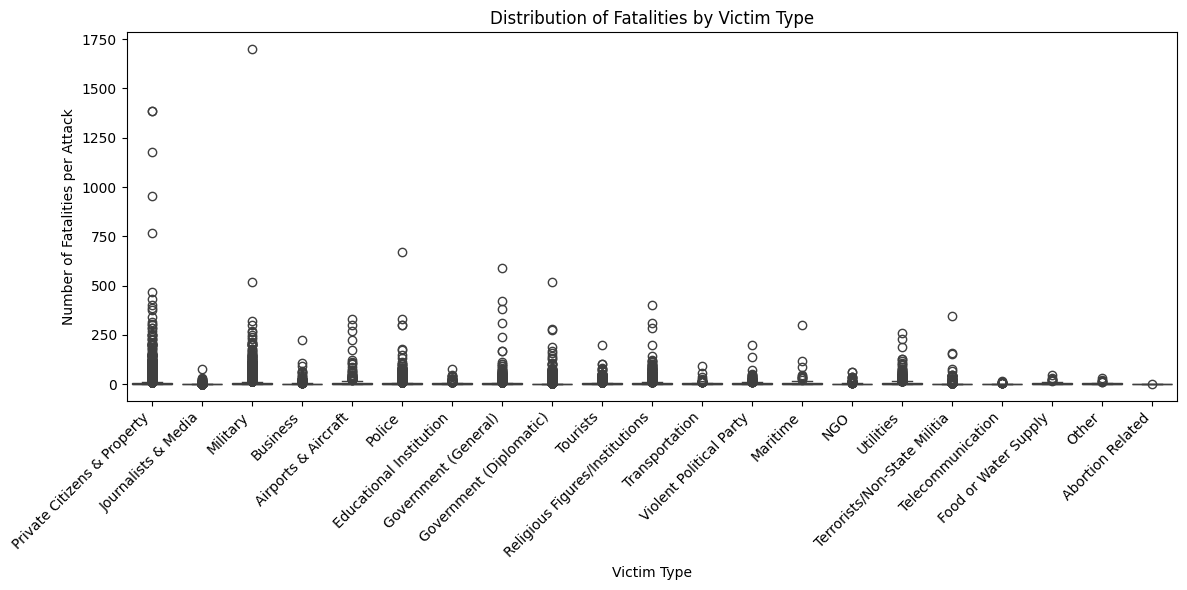

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['targtype1_label'].notna() & (df['nkill'] > 0)],
            x='targtype1_label', y='nkill')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Fatalities by Victim Type')
plt.xlabel('Victim Type')
plt.ylabel('Number of Fatalities per Attack')
plt.tight_layout()
plt.show()


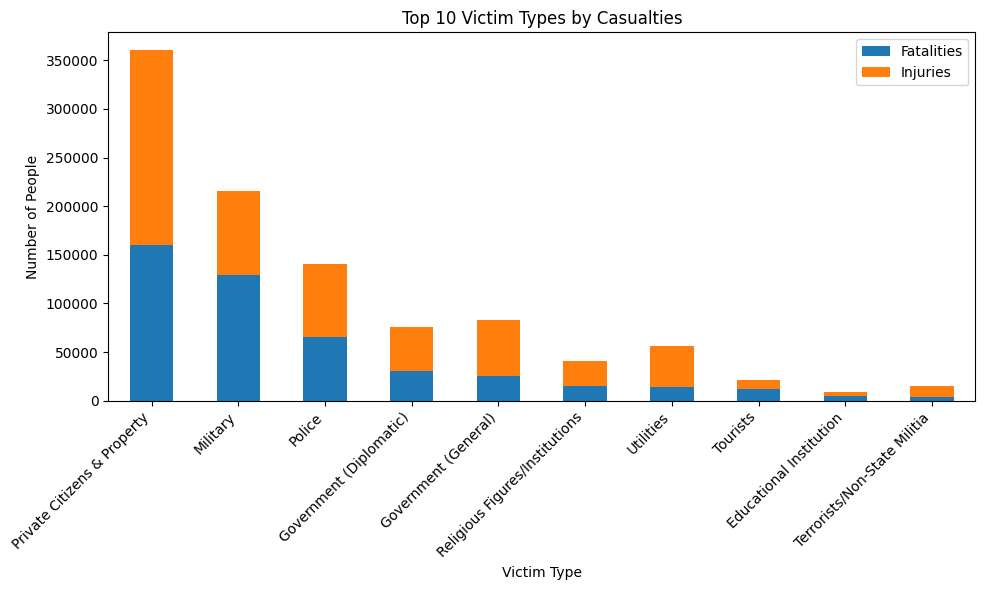

In [14]:
casualties_by_type = df.groupby('targtype1_label')[['nkill', 'nwound']].sum().sort_values(by='nkill', ascending=False).head(10)

casualties_by_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 10 Victim Types by Casualties')
plt.xlabel('Victim Type')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(['Fatalities', 'Injuries'])
plt.tight_layout()
plt.show()


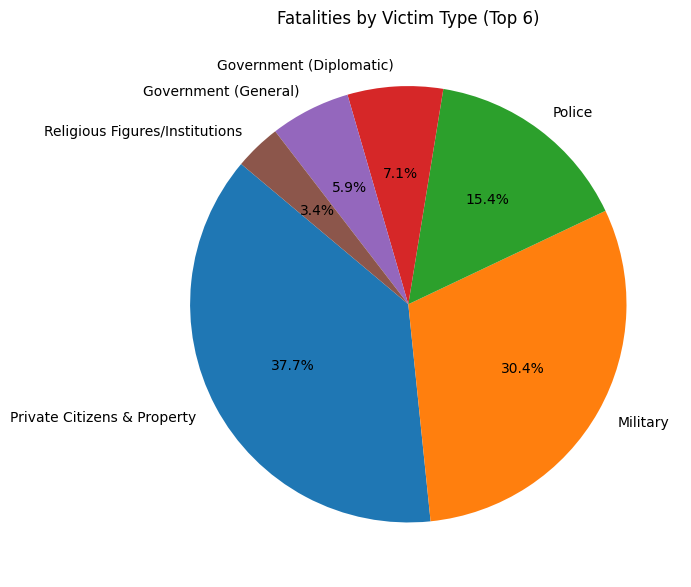

In [15]:
fatalities_by_type = df.groupby('targtype1_label')['nkill'].sum().sort_values(ascending=False).head(6)
plt.figure(figsize=(7, 7))
fatalities_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Fatalities by Victim Type (Top 6)')
plt.ylabel('')
plt.tight_layout()
plt.show()


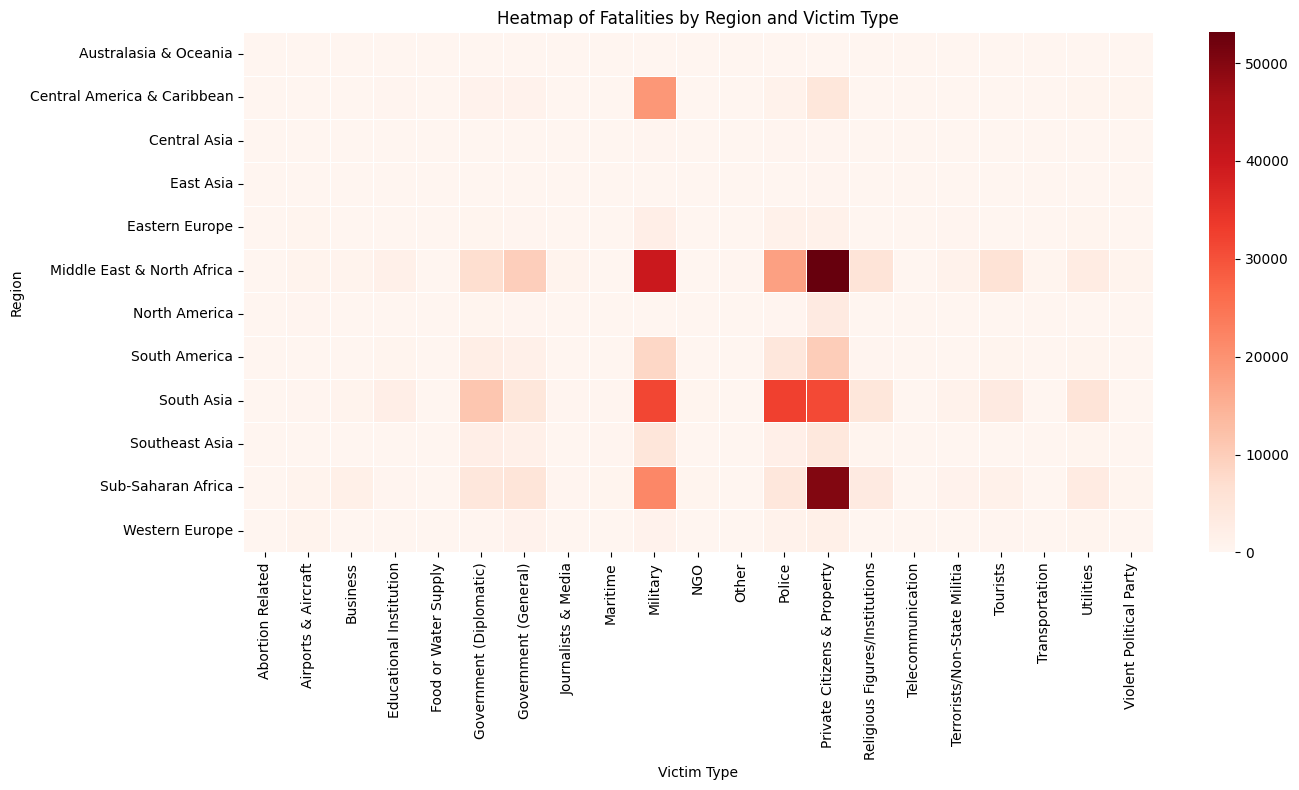

In [16]:
heatmap_data = df.pivot_table(index='region_txt', columns='targtype1_label', values='nkill', aggfunc='sum').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5)
plt.title('Heatmap of Fatalities by Region and Victim Type')
plt.xlabel('Victim Type')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


# Weapons and perpetrators
This notebook delves into the critical aspects of terrorist attacks: the actors involved and the tools they employ. Understanding these elements is crucial for comprehensive analysis and informed countermeasures. We will explore the following:
- Who is making the attacks? We will identify the groups and/or individuals responsible for terrorist acts, including the names of terrorist organizations.
- What weapons are used to carry out the attacks? We will analyze the types of weapons most frequently utilized in terrorist actions. This analysis will include visualizations, specifically a bar graph, to illustrate weapon prevalence.

## Filtering Dataset
The code converts data from an Excel file into a CSV file, so that it is easier to work with the data.

In [19]:
import pandas as pd
import numpy as np

# Transform the data from xlsx to csv
# Replace 'Sheet1' with the actual sheet name from the Excel filed
df = pd.read_excel('globalterrorismdb_0522dist.xlsx', sheet_name='Data')
df.to_csv('globalterrorismdb_0522dist.csv', index=False)

## Read in data
The code reads in the CSV file we exported earlier.

In [21]:
df = pd.read_csv('globalterrorismdb_0522dist.csv', low_memory=False)

## Filter out long entries

Vehicle category is long, so it is shortened so that it can be used for the plots later on.

In [22]:
df['weaptype1_txt'] = df['weaptype1_txt'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')

# Top 20 Terrorist Groups

Each bar in the chart represents a specific terrorist group, and the length of the bar corresponds to number of incidents associated with that group.

- Terrorist Group: The y-axis (vertical axis) lists the names of various terrorist groups.
- Numerical Value: The x-axis (horizontal axis) represents the number of incidents associated with each terrorist group.
- Excluding "Unknown": Groups labeled as "Unknown" were excluded from the data, so that relevant group names are displayed.

The chart shows that the Taliban has the highest number of incidents (11,982), far more than any other group in the top 20.  ISIL follows with 7,254 incidents, and Shining Path (SL) is third with 4,564. After the top three, there's a drop-off, with the remaining groups showing a more gradual decline.  The Communist Party of India - Maoist (CPI-Maoist) is among those with the fewest incidents in the top 20.

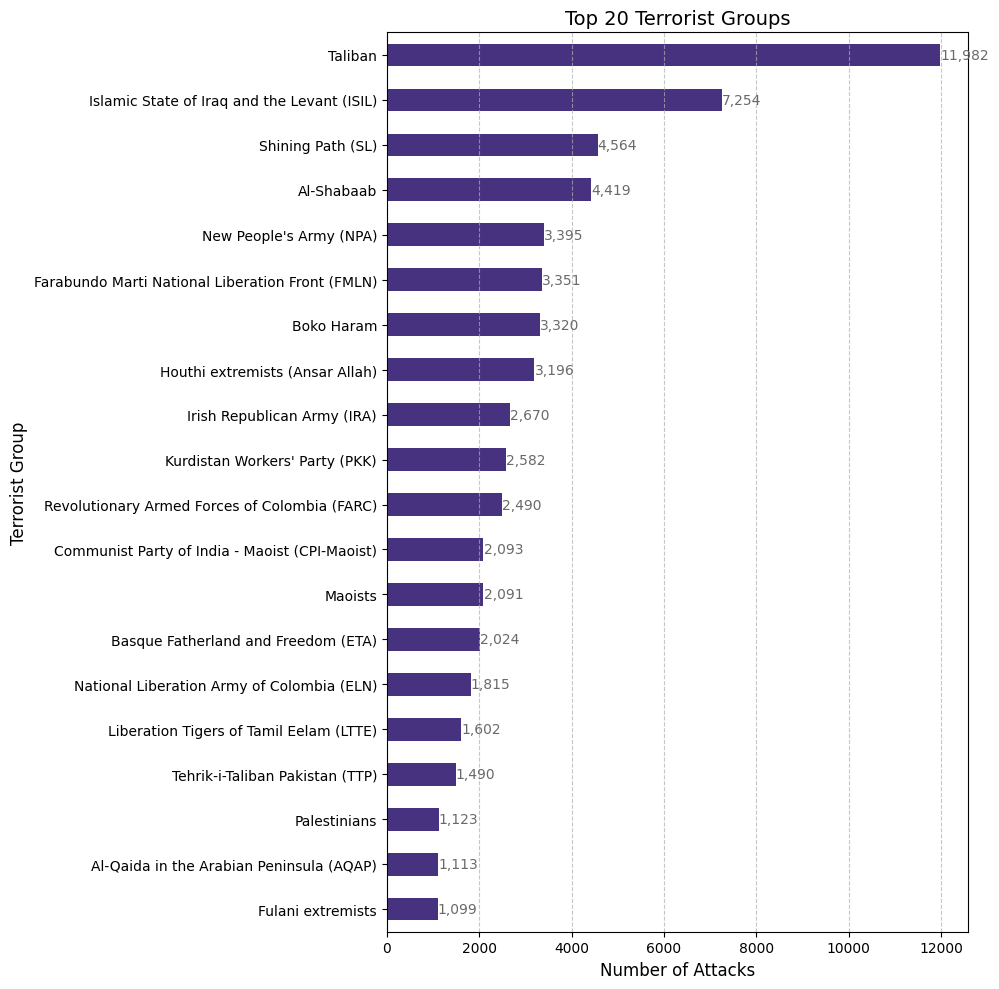

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_n_groups = 20
group_counts = df['gname'].value_counts()
filtered_groups = group_counts[group_counts.index != "Unknown"].nlargest(top_n_groups).iloc[::-1]

plt.figure(figsize=(10, 10)) 
sns.set_palette("viridis")
bars = filtered_groups.plot(kind='barh', edgecolor='none')  # Remove bar edges
plt.title(f'Top {top_n_groups} Terrorist Groups', fontsize=14)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Terrorist Group', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add a subtle horizontal grid

# Add number of data points beside each bar with better formatting
for bar in bars.patches:
    xval = bar.get_width()
    plt.text(xval + 3, bar.get_y() + bar.get_height()/2, f'{int(xval):,}', ha='left', va='center', fontsize=10, color='dimgray') # Formatted integer

plt.tight_layout()
plt.savefig("top_terrorist_groups.png")
plt.show()

# Top Weapon Types
The chart illustrates the distribution of weapon types employed in the reported attacks.  Less frequent weapon types have been aggregated into an "Other" category to enhance clarity.  The chart facilitates a comparative analysis of the prevalence of different weapon categories.

- Explosives represent the most substantial proportion, accounting for 49.3% of the attacks.  This indicates that explosive devices were the predominant weapon type in the dataset.
- Firearms were the second most frequently utilized weapon, observed in 32.3% of the attacks.
- A notable proportion, 9.6%, of attacks were carried out with Unknown weapon types.  This introduces an element of uncertainty into the analysis.
- Less frequently utilized weapon types, such as Incendiary and Melee weapons, constitute only minor proportions of the total.
- The “Other” category represents a negligible fraction of the attacks.

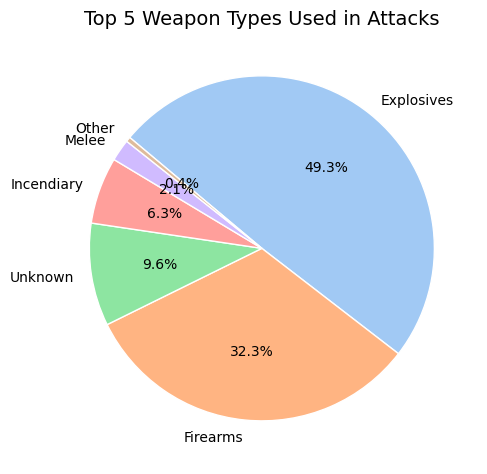

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count weapon types
weapon_counts = df['weaptype1_txt'].value_counts()

# Get top N weapon types
top_n = 5
top_weapons = weapon_counts.nlargest(top_n)

# Sum the rest as "Other"
other_total = weapon_counts.iloc[top_n:].sum()

# Combine top 5 with "Other" using pd.concat
combined_counts = pd.concat([top_weapons, pd.Series({'Other': other_total})])

# Plot
plt.figure(figsize=(5, 5))
colors = sns.color_palette("pastel", len(combined_counts))

plt.pie(combined_counts,
        labels=combined_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=140,
        counterclock=False,
        wedgeprops={'edgecolor': 'white'},
        textprops={'fontsize': 10})

plt.title(f'Top {top_n} Weapon Types Used in Attacks', fontsize=14)
plt.tight_layout()
plt.savefig("top_weapon_types.png")
plt.show()

# Top 20 Weapon Sub-types
The chart presents a categorical breakdown of weapon sub-types and their corresponding frequencies of use in reported attacks. The x-axis represents the number of attacks, while the y-axis enumerates specific weapon sub-types. The bars are arranged horizontally, allowing for a comparative assessment of the prevalence of each sub-type.

- The weapon sub-types with the highest frequency of use are "Unknown Explosive Type" and "Unknown Gun Type," with 48,807 and 40,783 attacks, respectively. The substantial number of attacks attributed to these unknown categories suggests a significant gap in data granularity, which may warrant further investigation.
- Among known weapon sub-types, "Automatic or Semi-Automatic Rifle" is the most prevalent, with 18,176 attacks. This indicates the frequent use of this weapon category in violent incidents.
- "Projectiles (rockets, mortars, RPGs, etc.)" and "Vehicle" also exhibit relatively high frequencies, with 12,031 and 10,849 attacks, respectively.
- The remaining weapon sub-types, including "Other Explosive Type," "Handgun," "Grenade," and others, show a progressive decline in frequency of use.

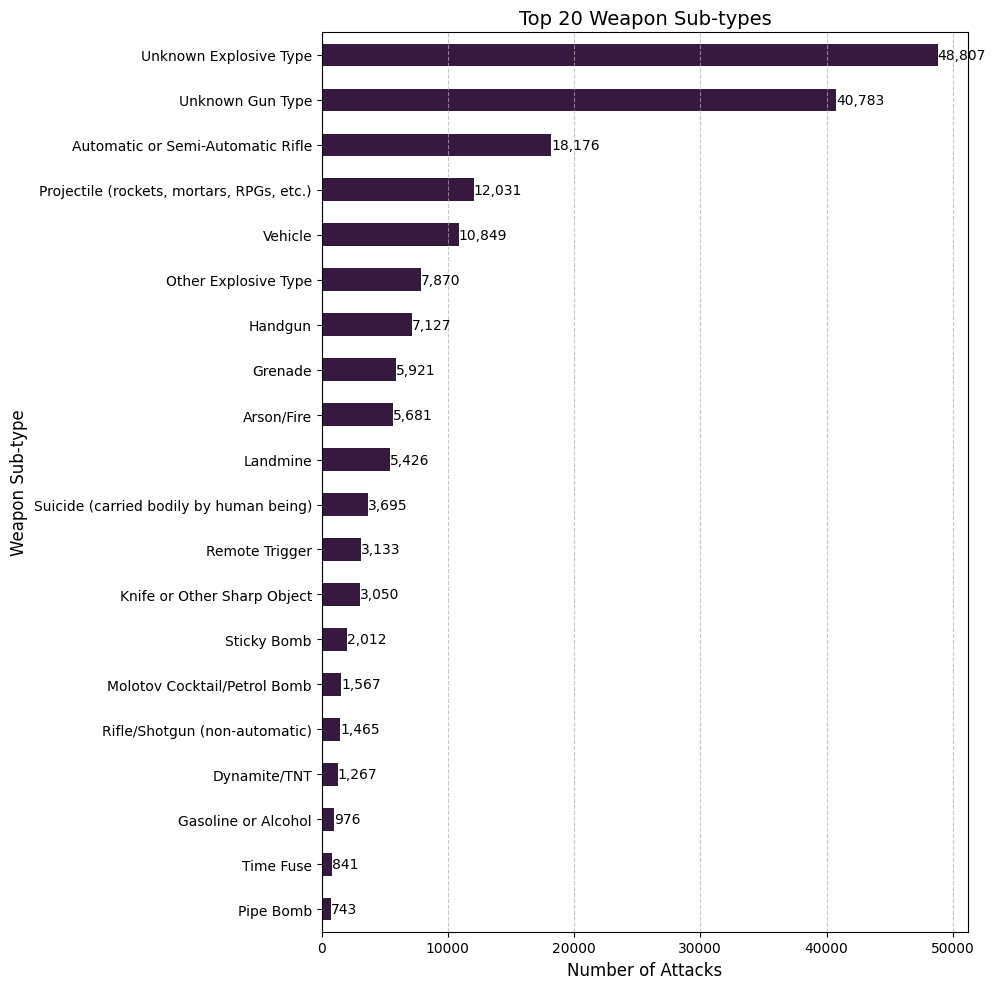

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For nicer color palettes

top_n_subtypes = 20
top_subtypes = df['weapsubtype1_txt'].value_counts().nlargest(top_n_subtypes).iloc[::-1]  # Reverse the Series

plt.figure(figsize=(10, 10)) 
sns.set_palette("rocket")  # Use Seaborn color palette
bars = top_subtypes.plot(kind='barh', edgecolor='none')  # Horizontal bars

plt.title(f'Top {top_n_subtypes} Weapon Sub-types', fontsize=14)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Weapon Sub-type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add number of data points to the right of each bar
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 3,  # Slightly to the right of the bar
             bar.get_y() + bar.get_height() / 2,
             f'{int(width):,}',
             ha='left', va='center',
             fontsize=10, color='black')  # Use black for visibility

plt.tight_layout()
plt.savefig("top_weapon_subtypes.png")
plt.show()

# Word Cloud of Weapon Sub-types

The image presents a word cloud visualization displaying various weapon sub-types. The size of each word is proportional to its frequency of occurrence within the dataset. This visualization provides a qualitative overview of the most frequently mentioned weapon sub-types.

- Terms such as "rifle," "gun," and "explosive" appear prominently, suggesting their prevalence in the data.
- Additional observations include the presence of terms like "vehicle," "projectile," and "grenade," indicating their relevance within the dataset.
- It is important to note that the word cloud does not contain "Unknown" weapon types, as these were excluded from the analysis. This exclusion allows for a clearer focus on the distribution of known weapon sub-types.

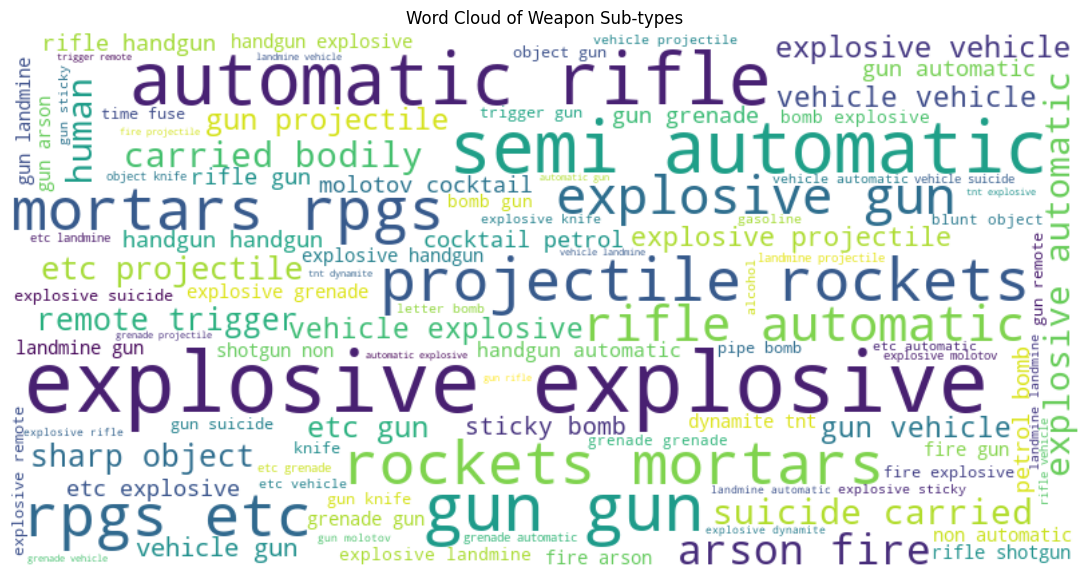

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Handle potential NaN values
weapon_subtypes_cleaned = df['weapsubtype1_txt'].dropna().astype(str)

filtered_words = []
for subtype in weapon_subtypes_cleaned:
    words = subtype.lower().split()  # Convert to lowercase and split into words
    for word in words:
        if "unknown" not in word and "type" not in word:
            filtered_words.append(word)

text = " ".join(filtered_words)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=100,
    colormap="viridis",
    random_state=42,
).generate(text)

plt.figure(figsize=(11, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Weapon Sub-types')
plt.tight_layout()
plt.savefig("word_cloud_of_weapon_subtypes.png")
plt.show()

## Weapon Types Over Time

The image displays a dynamic bar chart illustrating how the usage of different weapon types varies over time. Year 1993 is filtered out, because it has no data.

- Dynamic Interaction: The chart is interactive. You can hover over the bars to see the exact count and weapon type for a specific year.
- Time Slider: A slider allows you to adjust the year, enabling you to observe changes in weapon type usage across different years.

A notable trend observed throughout the years is the prevalence of Explosives, which consistently shows a high number of incidents, making it the most frequently used weapon type. Firearms typically follow as the second most common, while Incendiary weapons and, to a lesser extent, Melee weapons also appear with some regularity. Other weapon types such as Chemical, Sabotage Equipment, Fake Weapons, Radiological, Biological, and Other tend to be used much less frequently across the time period represented in the data.

In [27]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import (
    ColumnDataSource, Slider, NumeralTickFormatter,
    Legend, LegendItem, HoverTool, CustomJS, Range1d, Div
)
from bokeh.layouts import column
from bokeh.io import output_notebook, save, output_file
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10, Category20

# Show output in notebook
output_notebook()

# Ensure 'iyear' is integer
df['iyear'] = df['iyear'].astype(int)

# Group by year and weapon type and count occurrences
weapon_counts = df.groupby(['iyear', 'weaptype1_txt']).size().reset_index(name='count')

# Keep only years that have data
valid_years = sorted(weapon_counts['iyear'].unique().tolist())

# Get weapon types
weapon_types = weapon_counts['weaptype1_txt'].unique().tolist()
num_weapon_types = len(weapon_types)

# Choose palette
palette = Category10[num_weapon_types] if num_weapon_types <= 10 else Category20[min(num_weapon_types, 20)]

# Initial data load
initial_year = valid_years[0]
initial_data = weapon_counts[weapon_counts['iyear'] == initial_year]

# ColumnDataSource
source = ColumnDataSource(data=dict(
    years=initial_data['iyear'].tolist(),
    weapon_types=initial_data['weaptype1_txt'].tolist(),
    counts=initial_data['count'].tolist(),
))

# Create figure
p = figure(
    height=350,
    sizing_mode='stretch_width',
    title="Weapon Types Over Time",
    x_axis_label="Weapon Type",
    y_axis_label="Number of Incidents",
    x_range=weapon_types,
)
p.y_range = Range1d(start=0, end=initial_data['count'].max() * 1.1)

# Bars
bars = p.vbar(
    x='weapon_types',
    top='counts',
    width=0.9,
    source=source,
    line_color='white',
    fill_color=factor_cmap('weapon_types', palette=palette, factors=weapon_types),
)

# Legend
legend_items = [
    LegendItem(label=wtype, renderers=[bars], index=i)
    for i, wtype in enumerate(weapon_types)
]
legend = Legend(items=legend_items, location="center")
p.add_layout(legend, 'right')

# Hover tool
hover = HoverTool(
    tooltips=[
        ("Weapon Type", "@weapon_types"),
        ("Count", "@counts"),
    ],
    mode='vline',
    renderers=[bars]
)
p.add_tools(hover)

# Style
p.xgrid.grid_line_color = None
p.yaxis.formatter = NumeralTickFormatter(format="0")
p.xaxis.major_label_orientation = 0.8

# Slider (with index) and year display
year_slider = Slider(
    start=0,
    end=len(valid_years) - 1,
    step=1,
    value=0,
    title=None,  # Remove label to avoid double display
)

year_display = Div(text=f"<b>Year: {initial_year}</b>")

# JavaScript callback
callback = CustomJS(
    args=dict(
        source=source,
        weapon_counts_df=weapon_counts.to_json(orient='records'),
        y_range=p.y_range,
        year_display=year_display,
        valid_years=valid_years,
    ),
    code="""
    const data = JSON.parse(weapon_counts_df);
    const yearIndex = cb_obj.value;
    const selected_year = valid_years[yearIndex];
    const new_data = {'years': [], 'weapon_types': [], 'counts': []};
    let max_count = 0;

    for (let i = 0; i < data.length; i++) {
        if (data[i]['iyear'] === selected_year) {
            new_data['years'].push(data[i]['iyear']);
            new_data['weapon_types'].push(data[i]['weaptype1_txt']);
            new_data['counts'].push(data[i]['count']);
            if (data[i]['count'] > max_count) {
                max_count = data[i]['count'];
            }
        }
    }

    source.data = new_data;
    y_range.end = Math.ceil(max_count * 1.1);
    year_display.text = "<b>Year: " + selected_year + "</b>";
    """
)
year_slider.js_on_change('value', callback)

# Layout
layout = column(year_display, year_slider, p, sizing_mode='stretch_width')

# Show in notebook
show(layout)

output_file("weapon_types_over_time.html", title="Weapon Types Over Time")

# Save as HTML
save(layout, filename="weapon_types_over_time.html")

Loading BokehJS ...

'/Users/jonas/Documents/code/temp/socialdata2025/notebooks/weapon_types_over_time.html'

## Top Perpetrator Groups Over Time

This graph illustrates how the number of attacks attributed to the top 10 perpetrator groups has changed across different years. Unknown group is skipped to increase clarity.

- Dynamic Interaction: The graph is interactive. You can hover over the lines to see the exact number of attacks and the corresponding year for each group.
- Trend Visualization: The lines represent the trend for each perpetrator group over the years, allowing you to observe how their activity increases or decreases.
- Comparative Analysis: By plotting multiple groups on the same graph, it enables a comparison of their activity levels and trends.

The graph shows how the activity of different perpetrator groups has evolved over time. For example, you can observe the rise and fall of attacks by groups like the Irish Republican Army (IRA) and the Kurdistan Workers' Party (PKK) over the decades. Additionally, the graph highlights the emergence and surge in activity of groups like ISIL in more recent years. The Taliban, however, shows a noticeable presence throughout the entire period with varying levels of activity.

In [28]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter, HoverTool, Legend, LegendItem
from bokeh.layouts import column
from bokeh.io import output_notebook, output_file, save
from bokeh.palettes import Category20

# Ensure 'iyear' is an integer
df['iyear'] = df['iyear'].astype(int)

# Get the top N perpetrator groups (overall), excluding "Unknown"
top_n = 10
group_counts_all = df['gname'].value_counts()
filtered_counts = group_counts_all[group_counts_all.index != "Unknown"]
top_groups = filtered_counts.nlargest(top_n).index.tolist()
df_filtered = df[df['gname'].isin(top_groups)].copy()

# Group by year and group name, counting attacks
group_counts = df_filtered.groupby(['iyear', 'gname']).size().reset_index(name='attack_count')

# Get all unique years for the x-axis range
years = sorted(df['iyear'].unique())
min_year = min(years)
max_year = max(years)

# Create the Bokeh figure
p = figure(
    height=350,
    sizing_mode='stretch_width',
    title=f"Trend of Top {top_n} Perpetrator Groups Over Time",
    x_axis_label="Year",
    y_axis_label="Number of Attacks",
    x_range=(min_year, max_year),
)

# Add line renderers for each group and prepare for legend
palette = Category20[top_n]
legend_items = []

for i, group in enumerate(top_groups):
    group_data = group_counts[group_counts['gname'] == group]
    renderer = p.line(
        x=group_data['iyear'],
        y=group_data['attack_count'],
        line_width=2,
        color=palette[i % len(palette)],
        alpha=0.8,
    )
    legend_items.append(LegendItem(label=group, renderers=[renderer]))

# Customize appearance
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.formatter = NumeralTickFormatter(format="0")

# Add custom legend to the right
legend = Legend(items=legend_items)
p.add_layout(legend, 'right')
legend.click_policy = "hide"

# Add hover tool
hover = HoverTool(
    tooltips=[
        ("Year", "@x{0}"),
        ("Attacks", "@y"),
    ],
    mode="mouse",
)

p.add_tools(hover)

# Arrange layout (just the plot)
layout = column(p, sizing_mode='stretch_width')

# Output to Jupyter Notebook
output_notebook()
show(layout)

# Save as standalone HTML file
output_file("top_groups_over_time.html", title="Top Perpetrator Groups Over Time")
save(layout)

Loading BokehJS ...

'/Users/jonas/Documents/code/temp/socialdata2025/notebooks/top_groups_over_time.html'

# 4. Genre

## Genre of Data Story Used
- We used the “visualized article genre”, because it allows readers to explore interactive visualizations while still following a guided narrative structure.
- The story is divided into clear thematic sections - like “Incident + Attack,” “Victim + Casualties and Consequences,” and “Weapon + Perpetrator” - which helps convey different angles of the dataset in an organized way.
- The layout is scrollable and embedded on a website, making it easy for users to navigate and interact with each section on their own terms.

## Tools from the 3 Categories of Visual Narrative
**Visual Structure:**
- We used a consistent visual layout across all sections. Each chapter follows the same design pattern, which helps users stay oriented. The use of section titles (like “Victim + Casualties”) acts as soft annotations that guide interpretation without overwhelming the visuals.

**Interactivity:**
- We implemented interactive tools like heatmaps and dynamic charts that users can click or hover over. These features let users filter or explore the data by region and time, which supports a more exploratory and personal experience. It gives them control over what aspect of the data they want to focus on.

**Messaging:**
- Rather than drawing explicit conclusions, we tried to let the visuals speak for themselves. The headings introduce the topic of each section, but we avoided writing strong takeaways. This way, the narrative stays open-ended and encourages viewers to form their own interpretations.

## Tools from the 3 Categories of Narrative Structure
**Ordering:**
- The story follows a linear structure, starting with the incidents, then moving to the consequences, and ending with the actors involved (weapons and perpetrators). This order was chosen to mimic how a reader might naturally want to understand the lifecycle of an event - from what happened to who was affected and who was responsible.

**Interactivity/Control:**
- Since the project is web-based, users have the freedom to scroll at their own pace and interact with whichever visuals they find most interesting. This gives them some control over how they engage with the story, which was important for us.

**Messaging Emphasis:**
- We would say the balance is somewhere between reader-driven and author-driven. We provide structure through section titles and ordering, but left out heavy-handed conclusions or commentary. The goal was to guide the reader without restricting their exploration.

# 5. Visualizations

For our data story, we chose a set of interactive visualizations that each highlight a specific aspect of terrorism data. Specifically, we included a heatmap for the geographic distribution of attacks over time, bar and line charts to show trends in casualties and victim types, and categorical breakdowns for weapons and perpetrators.

These visualizations are well-suited to the story we want to tell because they each answer a different set of questions that a viewer might naturally have. The heatmap gives a powerful overview of where attacks are happening and how that changes over time, which sets the stage for understanding the global scope of the issue. The casualty and victim charts help the reader understand the impact of these attacks, both in terms of scale and human consequences. Finally, the weapon and perpetrator visuals give insight into the how and who behind the events, completing the narrative loop from incident to consequence to actor.

We chose these formats because they strike a balance between clarity and depth. They make patterns in the data more accessible without oversimplifying, and they allow viewers to explore further if they’re interested. Each visualization supports a specific chapter of the story and helps build a fuller understanding of the data.

# 6. Discussion

## What went well

- Data exploration and visualization: We successfully processed a massive dataset and extracted important data that enabled us to achieve correct and meaningful results.

- Use of mapping and grouping: We managed to create label maps for victim and weapon types/subtypes, making the results easier to interpret.

- Clear visual communication: We were able to effectively communicate our findings with the use of different charts and maps taught in the course.

## Future improvements

- Visual improvement of plots: There are endless possibilities when creating and styling plots. In the future we would like to experiment with different color palettes and font scaling to make our plots more visually appealing.

- Real-time data collection: Another future goal is to incorporate real-time data collection through APIs or web scraping that would enable us to maintain an up-to-date dataset and automatically refresh our visualizations.

# 7. Contributions

## Notebook

| Contribution | Student name | Student id |
| -------- | ------- | ------- |
| 1. Motivation | Manuel Ibanez Andujar | 232783 |
| 2. Basic stats | Manuel Ibanez Andujar | 232783 |
| 3. Data Analysis | Everyone | Everyone |
| 4. Genre | Jonas Puidokas | 137282 |
| 5. Visualizations | Jonas Puidokas | 137282 |
| 6. Discussion | Charalampos Stathopoulos | 243183 |
| 7. Contributions | Jonas Puidokas | 137282 |

## Website

| Contribution | Student name | Student id |
| -------- | ------- | ------- |
| Website setup | Jonas Puidokas | 137282 |
| Introduction | Manuel Ibanez Andujar | 232783 |
| Incident + attack | Manuel Ibanez Andujar | 232783 |
| Victim + casualties and consequences | Charalampos Stathopoulos | 243183 |
| Weapon + perpetrator | Jonas Puidokas | 137282 |
| Conclusion | Charalampos Stathopoulos | 243183 |